## Import Resources

# Your First AI application

Going forward, AI algorithms will be incorporated into more and more everyday applications. For example, you might want to include an image classifier in a smart phone app. To do this, you'd use a deep learning model trained on hundreds of thousands of images as part of the overall application architecture. A large part of software development in the future will be using these types of models as common parts of applications. 

In this project, you'll train an image classifier to recognize different species of flowers. You can imagine using something like this in a phone app that tells you the name of the flower your camera is looking at. In practice you'd train this classifier, then export it for use in your application. We'll be using [this dataset](http://www.robots.ox.ac.uk/~vgg/data/flowers/102/index.html) from Oxford of 102 flower categories, you can see a few examples below. 

<img src='assets/Flowers.png' width=500px>

The project is broken down into multiple steps:

* Load the image dataset and create a pipeline.
* Build and Train an image classifier on this dataset.
* Use your trained model to perform inference on flower images.

We'll lead you through each part which you'll implement in Python.

When you've completed this project, you'll have an application that can be trained on any set of labeled images. Here your network will be learning about flowers and end up as a command line application. But, what you do with your new skills depends on your imagination and effort in building a dataset. For example, imagine an app where you take a picture of a car, it tells you what the make and model is, then looks up information about it. Go build your own dataset and make something new.

In [1]:

# TODO: Make all necessary imports.
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image_dataset_from_directory

2025-03-17 15:25:35.365155: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-03-17 15:25:35.365200: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-03-17 15:25:35.365243: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-17 15:25:35.375079: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Load the Dataset

Here you'll use `tensorflow_datasets` to load the [Oxford Flowers 102 dataset](https://www.tensorflow.org/datasets/catalog/oxford_flowers102). This dataset has 3 splits: `'train'`, `'test'`, and `'validation'`.  You'll also need to make sure the training data is normalized and resized to 224x224 pixels as required by the pre-trained networks.

The validation and testing sets are used to measure the model's performance on data it hasn't seen yet, but you'll still need to normalize and resize the images to the appropriate size.

In [3]:

# TODO: Load the dataset with TensorFlow Datasets.
dataset = tfds.load('oxford_flowers102', as_supervised=True)


Dl Completed...: 0 url [00:00, ? url/s]
Dl Completed...: 100%|██████████| 3/3 [00:00<00:00, 102.62 url/s]
Extraction completed...: 0 file [00:00, ? file/s]
Dl Completed...: 100%|██████████| 3/3 [00:00<00:00, 92.80 url/s] 
2025-03-17 15:27:08.405603: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-03-17 15:27:08.417007: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-03-17 15:27:08.420231: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:89

Dataset oxford_flowers102 downloaded and prepared to /home/student/tensorflow_datasets/oxford_flowers102/2.1.1. Subsequent calls will reuse this data.


s-bus-pci#L344-L355
2025-03-17 15:27:08.750584: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-03-17 15:27:08.752695: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-03-17 15:27:08.754710: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentat

In [4]:
def preprocess(image, label):
    image = tf.image.resize(image, (224, 224))  
    image = image / 255.0  
    return image, label


In [5]:
# TODO: Create a training set, a validation set and a test set.
train_ds = dataset['train'].map(preprocess)
val_ds = dataset['validation'].map(preprocess)
test_ds = dataset['test'].map(preprocess)

## Explore the Dataset

In [6]:
# TODO: Get the number of examples in each set from the dataset info.
train_size = sum(1 for _ in dataset['train'])
test_size = sum(1 for _ in dataset['test'])
validation_size = sum(1 for _ in dataset['validation'])

print(f"Train Set Size: {train_size}")
print(f"Test Set Size: {test_size}")
print(f"Validation Set Size: {validation_size}")

# TODO: Get the number of classes in the dataset from the dataset info.
num_classes = len(set(label.numpy() for _, label in dataset['train']))
print(f"Number of Classes: {num_classes}")



Train Set Size: 1020
Test Set Size: 6149
Validation Set Size: 1020
Number of Classes: 102


In [7]:
#TODO: Print the shape and corresponding label of 3 images in the training set.

import json

# Loading the label mapping
with open('label_map.json') as f:
    label_map = json.load(f)

# Printing the shape and corresponding label of 3 images
for image, label in train_ds.take(3):
    print(f"Image Shape: {image.shape}, Label: {label_map[str(label.numpy())]}")

Image Shape: (224, 224, 3), Label: water lily
Image Shape: (224, 224, 3), Label: desert-rose
Image Shape: (224, 224, 3), Label: gazania


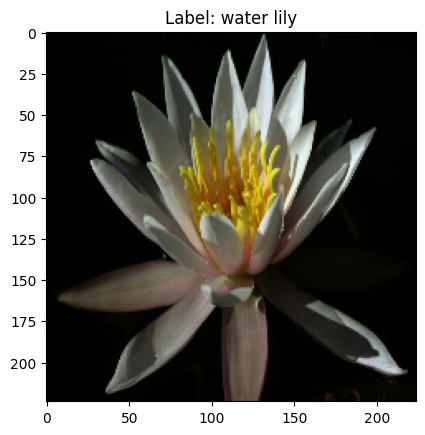

In [8]:
# TODO: Plot 1 image from the training set. Set the title 
# of the plot to the corresponding image label. 
import matplotlib.pyplot as plt
import json

# Loading the label mapping
with open('label_map.json') as f:
    label_map = json.load(f)

# Plotting 1 image from the training dataset
for image, label in train_ds.take(1):
    plt.imshow(image.numpy())
    plt.title(f"Label: {label_map[str(label.numpy())]}")
    plt.show()

### Label Mapping

You'll also need to load in a mapping from label to category name. You can find this in the file `label_map.json`. It's a JSON object which you can read in with the [`json` module](https://docs.python.org/3.7/library/json.html). This will give you a dictionary mapping the integer coded labels to the actual names of the flowers.

In [9]:
import matplotlib.pyplot as plt
import json

# Loading the label mapping
with open('label_map.json', 'r') as f:
    class_names = json.load(f)


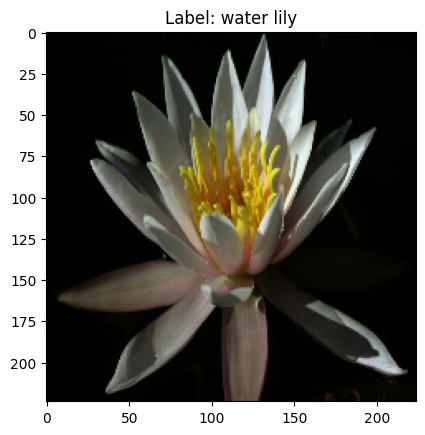

In [10]:
# TODO: Plot 1 image from the training set. Set the title 
# of the plot to the corresponding class name. 
for image, label in train_ds.take(1):
    plt.imshow(image.numpy())
    
    plt.title(f"Label: {class_names[str(label.numpy())]}")
    
    plt.show()


## Create Pipeline

In [11]:
# TODO: Create a pipeline for each set.

import tensorflow as tf

def preprocess(image, label):
    # Resizing images to 224x224 
    image = tf.image.resize(image, (224, 224))
    
    # Normalizing images to range [0, 1]
    image = image / 255.0
    
    return image, label


# Applying preprocessing to each dataset
train_ds = dataset['train'].map(preprocess)
val_ds = dataset['validation'].map(preprocess)
test_ds = dataset['test'].map(preprocess)

# Batching the datasets (I chose a batch size of 32)
train_ds = train_ds.batch(32)
val_ds = val_ds.batch(32)
test_ds = test_ds.batch(32)

# Prefetching to improve performance by preparing the next batch while the current batch is being processed
train_ds = train_ds.prefetch(tf.data.experimental.AUTOTUNE)
val_ds = val_ds.prefetch(tf.data.experimental.AUTOTUNE)
test_ds = test_ds.prefetch(tf.data.experimental.AUTOTUNE)



# Build and Train the Classifier

Now that the data is ready, it's time to build and train the classifier. You should use the MobileNet pre-trained model from TensorFlow Hub to get the image features. Build and train a new feed-forward classifier using those features.

We're going to leave this part up to you. If you want to talk through it with someone, chat with your fellow students! 

Refer to the rubric for guidance on successfully completing this section. Things you'll need to do:

* Load the MobileNet pre-trained network from TensorFlow Hub.
* Define a new, untrained feed-forward network as a classifier.
* Train the classifier.
* Plot the loss and accuracy values achieved during training for the training and validation set.
* Save your trained model as a Keras model. 

We've left a cell open for you below, but use as many as you need. Our advice is to break the problem up into smaller parts you can run separately. Check that each part is doing what you expect, then move on to the next. You'll likely find that as you work through each part, you'll need to go back and modify your previous code. This is totally normal!

When training make sure you're updating only the weights of the feed-forward network. You should be able to get the validation accuracy above 70% if you build everything right.

**Note for Workspace users:** One important tip if you're using the workspace to run your code: To avoid having your workspace disconnect during the long-running tasks in this notebook, please read in the earlier page in this lesson called Intro to GPU Workspaces about Keeping Your Session Active. You'll want to include code from the workspace_utils.py module. Also, If your model is over 1 GB when saved as a checkpoint, there might be issues with saving backups in your workspace. If your saved checkpoint is larger than 1 GB (you can open a terminal and check with `ls -lh`), you should reduce the size of your hidden layers and train again.

In [12]:
# TODO: Plot the loss and accuracy values achieved during training for the training and validation set.


from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt

# Loading MobileNet from TensorFlow Hub
mobilenet_url = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'
mobilenet_model = hub.KerasLayer(mobilenet_url, input_shape=(224, 224, 3))

# Defining model
model = tf.keras.Sequential([
    mobilenet_model,
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Increased dropout
    tf.keras.layers.Dense(102, activation='softmax')
])

# Freezing MobileNet layers
mobilenet_model.trainable = False

# Compiling the model with a slightly higher learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Early stopping to monitor validation loss
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Training the model
history = model.fit(train_ds,
                    epochs=30, 
                    validation_data=val_ds,
                    verbose=1,
                    callbacks=[early_stopping])  # Early stopping to prevent overfitting





Epoch 1/30


2025-03-17 15:29:07.925727: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8600
2025-03-17 15:29:10.408275: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0xdb4db60 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-03-17 15:29:10.408340: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
2025-03-17 15:29:10.415367: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-03-17 15:29:10.567471: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


32/32 [==============================] - 18s 332ms/step - loss: 4.4735 - accuracy: 0.0745 - val_loss: 3.4136 - val_accuracy: 0.4010
Epoch 2/30
32/32 [==============================] - 9s 264ms/step - loss: 2.6685 - accuracy: 0.4284 - val_loss: 2.1215 - val_accuracy: 0.6275
Epoch 3/30
32/32 [==============================] - 8s 253ms/step - loss: 1.5220 - accuracy: 0.6833 - val_loss: 1.4945 - val_accuracy: 0.7059
Epoch 4/30
32/32 [==============================] - 9s 276ms/step - loss: 0.8735 - accuracy: 0.8265 - val_loss: 1.1785 - val_accuracy: 0.7559
Epoch 5/30
32/32 [==============================] - 9s 272ms/step - loss: 0.5397 - accuracy: 0.8990 - val_loss: 1.0159 - val_accuracy: 0.7843
Epoch 6/30
32/32 [==============================] - 9s 263ms/step - loss: 0.3907 - accuracy: 0.9206 - val_loss: 0.9296 - val_accuracy: 0.7794
Epoch 7/30
32/32 [==============================] - 8s 253ms/step - loss: 0.2941 - accuracy: 0.9510 - val_loss: 0.8625 - val_accuracy: 0.7990
Epoch 8/30
32/32

## Testing your Network

It's good practice to test your trained network on test data, images the network has never seen either in training or validation. This will give you a good estimate for the model's performance on completely new images. You should be able to reach around 70% accuracy on the test set if the model has been trained well.

In [13]:
# TODO: Print the loss and accuracy values achieved on the entire test set.
# Evaluating the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_ds)

# Printing the loss and accuracy achieved on the test set
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


193/193 [==============================] - 26s 131ms/step - loss: 0.8041 - accuracy: 0.7922
Test Loss: 0.8041273355484009
Test Accuracy: 0.7921613454818726


## Save the Model

Now that your network is trained, save the model so you can load it later for making inference. In the cell below save your model as a Keras model (*i.e.* save it as an HDF5 file).

In [14]:
# TODO: Save your trained model as a Keras model.
model.save('flower_classifier_model.keras')



## Load the Keras Model

Load the Keras model you saved above.

In [15]:
# TODO: Load the Keras model
# Loading the Keras model from the saved file
loaded_model = tf.keras.models.load_model('flower_classifier_model.keras', custom_objects={'KerasLayer': hub.KerasLayer})

# Checking the model architecture
loaded_model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 1024)              1311744   
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 102)               104550    
                                                                 
Total params: 3674278 (14.02 MB)
Trainable params: 1416294 (5.40 MB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


# Inference for Classification

Now you'll write a function that uses your trained network for inference. Write a function called `predict` that takes an image, a model, and then returns the top $K$ most likely class labels along with the probabilities. The function call should look like: 

```python
probs, classes = predict(image_path, model, top_k)
```

If `top_k=5` the output of the `predict` function should be something like this:

```python
probs, classes = predict(image_path, model, 5)
print(probs)
print(classes)
> [ 0.01558163  0.01541934  0.01452626  0.01443549  0.01407339]
> ['70', '3', '45', '62', '55']
```

Your `predict` function should use `PIL` to load the image from the given `image_path`. You can use the [Image.open](https://pillow.readthedocs.io/en/latest/reference/Image.html#PIL.Image.open) function to load the images. The `Image.open()` function returns an `Image` object. You can convert this `Image` object to a NumPy array by using the `np.asarray()` function.

The `predict` function will also need to handle pre-processing the input image such that it can be used by your model. We recommend you write a separate function called `process_image` that performs the pre-processing. You can then call the `process_image` function from the `predict` function. 

### Image Pre-processing

The `process_image` function should take in an image (in the form of a NumPy array) and return an image in the form of a NumPy array with shape `(224, 224, 3)`.

First, you should convert your image into a TensorFlow Tensor and then resize it to the appropriate size using `tf.image.resize`.

Second, the pixel values of the input images are typically encoded as integers in the range 0-255, but the model expects the pixel values to be floats in the range 0-1. Therefore, you'll also need to normalize the pixel values. 

Finally, convert your image back to a NumPy array using the `.numpy()` method.

In [16]:
# TODO: Create the process_image function
import tensorflow as tf
from PIL import Image
import numpy as np

def process_image(image_path):
    """
    Takes in an image path, loads the image, and preprocesses it
    to make it ready for inference by the model.

    Args:
    - image_path (str): Path to the image to be processed.

    Returns:
    - numpy.ndarray: Preprocessed image in the form (224, 224, 3)
    """
    image = Image.open(image_path)

    image = np.asarray(image)

    image = tf.convert_to_tensor(image, dtype=tf.float32)

    image = tf.image.resize(image, (224, 224))

    image = image / 255.0

    return image.numpy()



To check your `process_image` function we have provided 4 images in the `./test_images/` folder:

* cautleya_spicata.jpg
* hard-leaved_pocket_orchid.jpg
* orange_dahlia.jpg
* wild_pansy.jpg

The code below loads one of the above images using `PIL` and plots the original image alongside the image produced by your `process_image` function. If your `process_image` function works, the plotted image should be the correct size. 

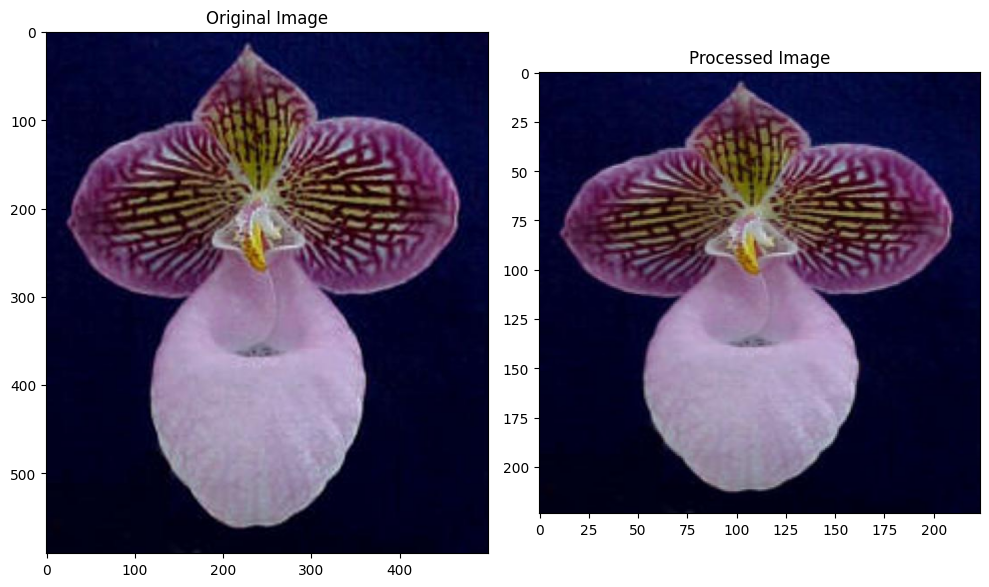

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Defining the image path
image_path = './test_images/hard-leaved_pocket_orchid.jpg'

# Loading the original image using PIL
im = Image.open(image_path)
test_image = np.asarray(im)

# Processing the image using the process_image function
processed_test_image = process_image(image_path)  # Pass the image path directly to the process_image function

# Plotting the original image and the processed image side by side
fig, (ax1, ax2) = plt.subplots(figsize=(10,10), ncols=2)

# Original image
ax1.imshow(test_image)
ax1.set_title('Original Image')

# Processed image
ax2.imshow(processed_test_image)
ax2.set_title('Processed Image')

plt.tight_layout()
plt.show()


Once you can get images in the correct format, it's time to write the `predict` function for making inference with your model.

### Inference

Remember, the `predict` function should take an image, a model, and then returns the top $K$ most likely class labels along with the probabilities. The function call should look like: 

```python
probs, classes = predict(image_path, model, top_k)
```

If `top_k=5` the output of the `predict` function should be something like this:

```python
probs, classes = predict(image_path, model, 5)
print(probs)
print(classes)
> [ 0.01558163  0.01541934  0.01452626  0.01443549  0.01407339]
> ['70', '3', '45', '62', '55']
```

Your `predict` function should use `PIL` to load the image from the given `image_path`. You can use the [Image.open](https://pillow.readthedocs.io/en/latest/reference/Image.html#PIL.Image.open) function to load the images. The `Image.open()` function returns an `Image` object. You can convert this `Image` object to a NumPy array by using the `np.asarray()` function.

**Note:** The image returned by the `process_image` function is a NumPy array with shape `(224, 224, 3)` but the model expects the input images to be of shape `(1, 224, 224, 3)`. This extra dimension represents the batch size. We suggest you use the `np.expand_dims()` function to add the extra dimension. 

In [18]:
# TODO: Create the predict function
# TODO: Create the predict function

def predict(image_path, model, top_k=5):
    """
    Predicts the top K class labels and their probabilities for a given image.

    Args:
    - image_path (str): Path to the image to be classified.
    - model: The trained Keras model to use for predictions.
    - top_k (int): The number of top predictions to return (default is 5).

    Returns:
    - probs (numpy.ndarray): Array of probabilities for the top K classes.
    - classes (list): List of class labels corresponding to the top K probabilities.
    """
    
    image = process_image(image_path)  
    
    
    image = np.expand_dims(image, axis=0)

    
    predictions = model.predict(image)

    
    top_k_probs = tf.nn.top_k(predictions[0], k=top_k)

    
    return top_k_probs.values.numpy(), top_k_probs.indices.numpy().astype(str)




# Sanity Check

It's always good to check the predictions made by your model to make sure they are correct. To check your predictions we have provided 4 images in the `./test_images/` folder:

* cautleya_spicata.jpg
* hard-leaved_pocket_orchid.jpg
* orange_dahlia.jpg
* wild_pansy.jpg

In the cell below use `matplotlib` to plot the input image alongside the probabilities for the top 5 classes predicted by your model. Plot the probabilities as a bar graph. The plot should look like this:

<img src='assets/inference_example.png' width=600px>

You can convert from the class integer labels to actual flower names using `class_names`. 

1/1 [==============================] - 1s 919ms/step


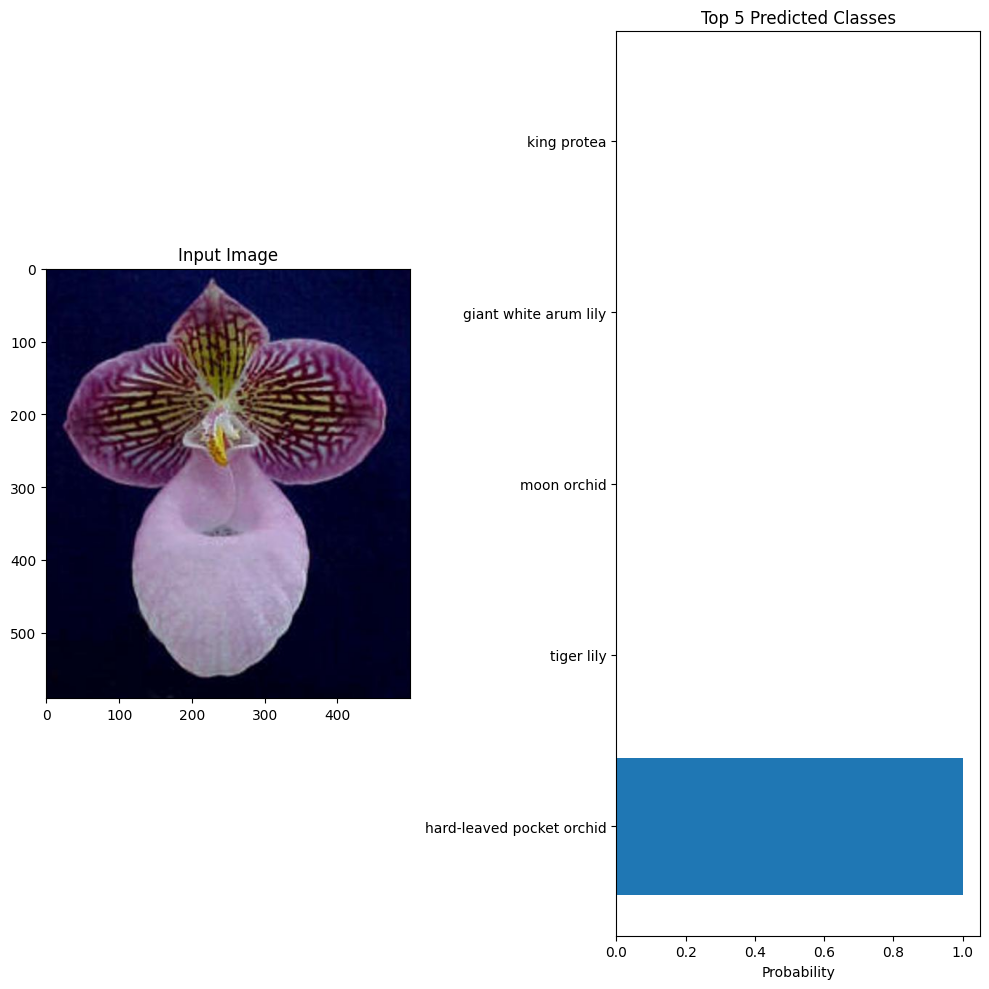

In [19]:
# TODO: Plot the input image along with the top 5 classes
# Create the complete mapping of class indices to class names (example, needs to be filled with all class labels)
class_names= {"0": "pink primrose", "1": "hard-leaved pocket orchid", "2": "canterbury bells", "3": "sweet pea", "4": "english marigold", "5": "tiger lily", "6": "moon orchid", "7": "bird of paradise", "8": "monkshood", "9": "globe thistle", "10": "snapdragon", "11": "colt's foot", "12": "king protea", "13": "spear thistle", "14": "yellow iris", "15": "globe-flower", "16": "purple coneflower", "17": "peruvian lily", "18": "balloon flower", "19": "giant white arum lily", "20": "fire lily", "21": "pincushion flower", "22": "fritillary", "23": "red ginger", "24": "grape hyacinth", "25": "corn poppy", "26": "prince of wales feathers", "27": "stemless gentian", "28": "artichoke", "29": "sweet william", "30": "carnation", "31": "garden phlox", "32": "love in the mist", "33": "mexican aster", "34": "alpine sea holly", "35": "ruby-lipped cattleya", "36": "cape flower", "37": "great masterwort", "38": "siam tulip", "39": "lenten rose", "40": "barbeton daisy", "41": "daffodil", "42": "sword lily", "43": "poinsettia", "44": "bolero deep blue", "45": "wallflower", "46": "marigold", "47": "buttercup", "48": "oxeye daisy", "49": "common dandelion", "50": "petunia", "51": "wild pansy", "52": "primula", "53": "sunflower", "54": "pelargonium", "55": "bishop of llandaff", "56": "gaura", "57": "geranium", "58": "orange dahlia", "59": "pink-yellow dahlia?", "60": "cautleya spicata", "61": "japanese anemone", "62": "black-eyed susan", "63": "silverbush", "64": "californian poppy", "65": "osteospermum", "66": "spring crocus", "67": "bearded iris", "68": "windflower", "69": "tree poppy", "70": "gazania", "71": "azalea", "72": "water lily", "73": "rose", "74": "thorn apple", "75": "morning glory", "76": "passion flower", "77": "lotus", "78": "toad lily", "79": "anthurium", "80": "frangipani", "81": "clematis", "82": "hibiscus", "83": "columbine", "84": "desert-rose", "85": "tree mallow", "86": "magnolia", "87": "cyclamen", "88": "watercress", "89": "canna lily", "90": "hippeastrum", "91": "bee balm", "92": "ball moss", "93": "foxglove", "94": "bougainvillea", "95": "camellia", "96": "mallow", "97": "mexican petunia", "98": "bromelia", "99": "blanket flower", "100": "trumpet creeper", "101": "blackberry lily"}

def sanity_check(image_path, model, top_k=5):
    # Getting top K predictions and class labels
    probs, classes = predict(image_path, model, top_k)

    # Loading the original image
    image = Image.open(image_path)
    test_image = np.asarray(image)

    # Converting class indices to flower names using the class_names dictionary
    class_labels = [class_names.get(str(i), 'Unknown') for i in classes]  

    # Plotting the original image and the processed image side by side
    fig, (ax1, ax2) = plt.subplots(figsize=(10, 10), ncols=2)

    # Plotting the input image
    ax1.imshow(test_image)
    ax1.set_title('Input Image')

    # Plotting the top K class probabilities as a bar graph
    ax2.barh(class_labels, probs)
    ax2.set_title('Top 5 Predicted Classes')
    ax2.set_xlabel('Probability')

    plt.tight_layout()
    plt.show()

image_path = './test_images/hard-leaved_pocket_orchid.jpg'  
sanity_check(image_path, model, top_k=5)
